In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\TiTO.tech\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

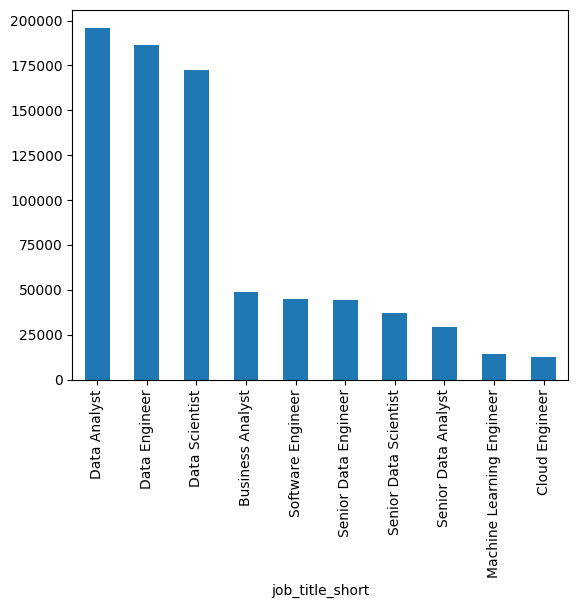

In [4]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar',ax=ax)





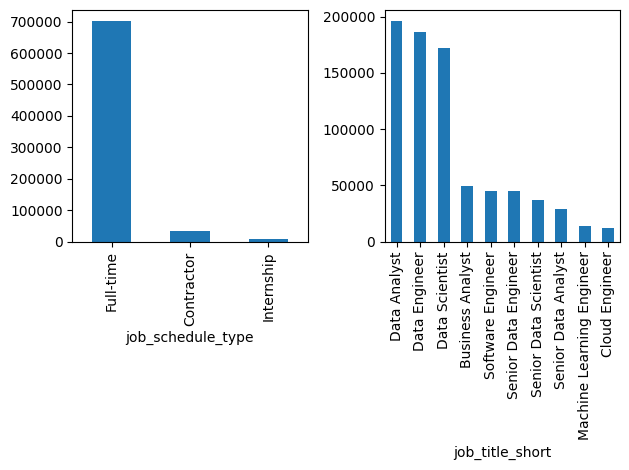

In [11]:
fig,ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[0])
fig.tight_layout()

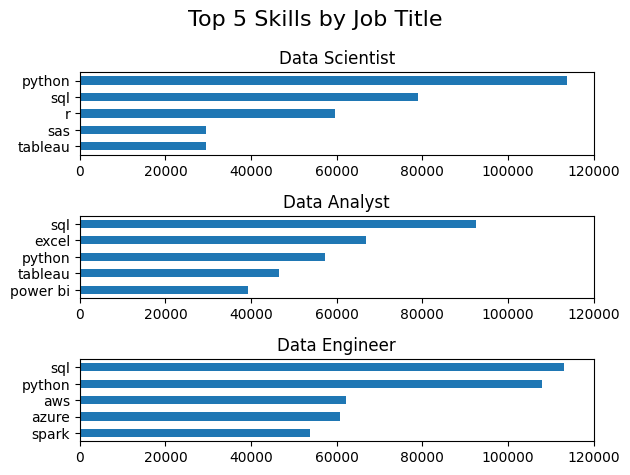

In [10]:
df_skills = df.copy()
df_exploaded = df.explode('job_skills')
skills_count = df_exploaded.groupby(['job_title_short','job_skills',]).size()
df_skills_count = skills_count.reset_index(name='skill_counts')
df_skills_count = df_skills_count.sort_values(by='skill_counts', ascending=False,inplace=True)
df_skills_count

job_titles = ['Data Scientist','Data Analyst' ,'Data Engineer', ]

df_skills_count = skills_count.reset_index(name='skill_counts')
df_skills_count = df_skills_count.sort_values(by='skill_counts', ascending=False)
df_skills_count
fig, ax = plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_plot =df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_counts', ax=ax[i],title=job_title,)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,120000)


fig.suptitle('Top 5 Skills by Job Title', fontsize=16)
fig.tight_layout()